In [59]:
import pandas as pd
import numpy as np

import seaborn as sns

pd.set_option('display.max_columns', 500)

In [4]:
test_df = pd.read_csv('./data/test_energy.csv')
print(test_df.shape)

(117128, 202)


In [8]:
test_df.head()

,user_id,day_pod,prediction_window_T0,day_of_year_sin_T0,day_of_year_cos_T0,min_temp_T0,min_temp_T1,min_temp_T2,min_temp_T3,min_temp_T4,min_temp_T5,min_temp_T6,min_temp_T7,min_temp_T8,min_temp_T9,min_temp_T10,min_temp_T11,min_temp_T12,min_temp_T13,min_temp_T14,min_temp_T15,min_temp_T16,min_temp_T17,min_temp_T18,min_temp_T19,min_temp_T20,min_temp_T21,min_temp_T22,min_temp_T23,min_temp_T24,min_temp_T25,min_temp_T26,min_temp_T27,max_temp_T0,max_temp_T1,max_temp_T2,max_temp_T3,max_temp_T4,max_temp_T5,max_temp_T6,max_temp_T7,max_temp_T8,max_temp_T9,max_temp_T10,max_temp_T11,max_temp_T12,max_temp_T13,max_temp_T14,max_temp_T15,max_temp_T16,max_temp_T17,max_temp_T18,max_temp_T19,max_temp_T20,max_temp_T21,max_temp_T22,max_temp_T23,max_temp_T24,max_temp_T25,max_temp_T26,max_temp_T27,holiday_T0,holiday_T1,holiday_T2,holiday_T3,holiday_T4,holiday_T5,holiday_T6,holiday_T7,holiday_T8,holiday_T9,holiday_T10,holiday_T11,holiday_T12,holiday_T13,holiday_T14,holiday_T15,holiday_T16,holiday_T17,holiday_T18,holiday_T19,holiday_T20,holiday_T21,holiday_T22,holiday_T23,holiday_T24,holiday_T25,holiday_T26,holiday_T27,total_consumption_T_minus_84,total_consumption_T_minus_83,total_consumption_T_minus_82,total_consumption_T_minus_81,total_consumption_T_minus_80,total_consumption_T_minus_79,total_consumption_T_minus_78,total_consumption_T_minus_77,total_consumption_T_minus_76,total_consumption_T_minus_75,total_consumption_T_minus_74,total_consumption_T_minus_73,total_consumption_T_minus_72,total_consumption_T_minus_71,total_consumption_T_minus_70,total_consumption_T_minus_69,total_consumption_T_minus_68,total_consumption_T_minus_67,total_consumption_T_minus_66,total_consumption_T_minus_65,total_consumption_T_minus_64,total_consumption_T_minus_63,total_consumption_T_minus_62,total_consumption_T_minus_61,total_consumption_T_minus_60,total_consumption_T_minus_59,total_consumption_T_minus_58,total_consumption_T_minus_57,total_consumption_T_minus_56,total_consumption_T_minus_55,total_consumption_T_minus_54,total_consumption_T_minus_53,total_consumption_T_minus_52,total_consumption_T_minus_51,total_consumption_T_minus_50,total_consumption_T_minus_49,total_consumption_T_minus_48,total_consumption_T_minus_47,total_consumption_T_minus_46,total_consumption_T_minus_45,total_consumption_T_minus_44,total_consumption_T_minus_43,total_consumption_T_minus_42,total_consumption_T_minus_41,total_consumption_T_minus_40,total_consumption_T_minus_39,total_consumption_T_minus_38,total_consumption_T_minus_37,total_consumption_T_minus_36,total_consumption_T_minus_35,total_consumption_T_minus_34,total_consumption_T_minus_33,total_consumption_T_minus_32,total_consumption_T_minus_31,total_consumption_T_minus_30,total_consumption_T_minus_29,total_consumption_T_minus_365,total_consumption_T_minus_364,total_consumption_T_minus_363,total_consumption_T_minus_362,total_consumption_T_minus_361,total_consumption_T_minus_360,total_consumption_T_minus_359,total_consumption_T_minus_358,total_consumption_T_minus_357,total_consumption_T_minus_356,total_consumption_T_minus_355,total_consumption_T_minus_354,total_consumption_T_minus_353,total_consumption_T_minus_352,total_consumption_T_minus_351,total_consumption_T_minus_350,total_consumption_T_minus_349,total_consumption_T_minus_348,total_consumption_T_minus_347,total_consumption_T_minus_346,total_consumption_T_minus_345,total_consumption_T_minus_344,total_consumption_T_minus_343,total_consumption_T_minus_342,total_consumption_T_minus_341,total_consumption_T_minus_340,total_consumption_T_minus_339,total_consumption_T_minus_338,total_consumption_T0,total_consumption_T1,total_consumption_T2,total_consumption_T3,total_consumption_T4,total_consumption_T5,total_consumption_T6,total_consumption_T7,total_consumption_T8,total_consumption_T9,total_consumption_T10,total_consumption_T11,total_consumption_T12,total_consumption_T13,total_consumption_T14,total_consumption_T15,total_consumption_T16,total_consumption_T17,total_consumption_T18,total_consumption_

In [9]:
cols_labels = [f'total_consumption_T{i}' for i in range(28)]
cols_historical = [f'total_consumption_T_minus_{i}' for i in range(56, 28, -1)]

In [11]:
len(cols_historical)

28

In [12]:
len(cols_labels)

28

In [14]:
cols_historical

['total_consumption_T_minus_56',
 'total_consumption_T_minus_55',
 'total_consumption_T_minus_54',
 'total_consumption_T_minus_53',
 'total_consumption_T_minus_52',
 'total_consumption_T_minus_51',
 'total_consumption_T_minus_50',
 'total_consumption_T_minus_49',
 'total_consumption_T_minus_48',
 'total_consumption_T_minus_47',
 'total_consumption_T_minus_46',
 'total_consumption_T_minus_45',
 'total_consumption_T_minus_44',
 'total_consumption_T_minus_43',
 'total_consumption_T_minus_42',
 'total_consumption_T_minus_41',
 'total_consumption_T_minus_40',
 'total_consumption_T_minus_39',
 'total_consumption_T_minus_38',
 'total_consumption_T_minus_37',
 'total_consumption_T_minus_36',
 'total_consumption_T_minus_35',
 'total_consumption_T_minus_34',
 'total_consumption_T_minus_33',
 'total_consumption_T_minus_32',
 'total_consumption_T_minus_31',
 'total_consumption_T_minus_30',
 'total_consumption_T_minus_29']

In [16]:
index_0 = [ele for index, ele in enumerate(cols_historical) if index % 7 == 0]
index_1 = [ele for index, ele in enumerate(cols_historical) if index % 7 == 1]

In [17]:
index_1

['total_consumption_T_minus_55',
 'total_consumption_T_minus_48',
 'total_consumption_T_minus_41',
 'total_consumption_T_minus_34']

In [18]:
test_df[index_0]

,total_consumption_T_minus_56,total_consumption_T_minus_49,total_consumption_T_minus_42,total_consumption_T_minus_35
0,3656.336554,7667.874396,7620.209340,7412.850242
1,5316.182573,5213.278008,5453.941909,5418.257261
2,12743.855816,12474.057892,12337.520481,11034.407428
3,11981.975487,11929.343908,11788.752704,11923.576063
4,6594.758065,6824.596774,6731.182796,5879.704301
...,...,...,...,...
117123,8571.726768,9037.808599,7731.712899,7439.625520
117124,9963.562753,9331.983806,8825.910931,8368.421053
117125,23593.662651,22805.325301,22287.542169,20786.867470
117126,11645.168394,7331.567358,10607.590674,10039.559585


In [35]:
def get_historical_daily_mean(row):
    
    sorted_arr = sorted(row.values)
    median = (sorted_arr[1] + sorted_arr[2]) / 2
    
    return median

In [69]:
def get_historical_daily_mean(row):
    
    sorted_arr = sorted(row.values)
    median = (sorted_arr[1] + sorted_arr[2]) / 2
    
    return median


def calculate_rmse(test_df, by_day=False):
    
    cols_historical = [f'total_consumption_T_minus_{i}' for i in range(56, 28, -1)]
    
    all_series = []

    for i in range(7):
        index = [ele for index, ele in enumerate(cols_historical) if index % 7 == i]
        _series = test_df[index].apply(get_historical_daily_mean, axis=1)
        all_series.append(_series)

    historical = pd.concat(all_series*4, axis=1)
    
    # true y
    cols_labels = [f'total_consumption_T{i}' for i in range(28)]
    y = test_df[cols_labels]
    
    assert y.values.shape == historical.values.shape, "outputs don't match"
    
    if by_day:
        return np.sqrt(np.mean((historical.values - y.values)**2, axis=0))
    
    return np.sqrt(np.mean((historical.values - y.values)**2))
    
    

In [71]:
calculate_rmse(test_df, by_day=True)

array([42561.3644867 , 42933.92257812, 42997.47818458, 43830.33400502,
       43717.07686774, 43596.14089554, 43429.03712489, 48429.87794268,
       48542.2865271 , 47991.9848209 , 48283.61499678, 47510.64568983,
       48542.97975359, 49698.6883134 , 53668.75367334, 53252.63085971,
       53360.63010596, 51637.7471065 , 51457.82701538, 51218.5989743 ,
       52316.9944218 , 56999.23839788, 56890.97883121, 56746.78568829,
       57881.97219181, 58612.58247202, 57683.09752315, 58267.59524543])

In [75]:
for pod in test_df['day_pod'].unique():

    mask = (test_df['day_pod'] == pod)
    rmse = calculate_rmse(test_df[mask])
    print(f'{pod} RMSE: {rmse}')

1 RMSE: 65725.19403782535
0 RMSE: 28333.79858686703


In [ ]:
MT_362 RMSE: 972214.9364451193

MT_003 RMSE: 21.604560034247267

In [72]:
for user in test_df['user_id'].unique():
    mask = (test_df['user_id'] == user)
    rmse = calculate_rmse(test_df[mask])
    print(f'{user} RMSE: {rmse}')

MT_302 RMSE: 819.4779400085621
MT_127 RMSE: 1927.4704241050333
MT_193 RMSE: 2202.191985165441
MT_342 RMSE: 2146.365237213434
MT_197 RMSE: 881.0892863693066
MT_357 RMSE: 13471.442265787888
MT_226 RMSE: 2987.1870498630774
MT_166 RMSE: 5778.058590135956
MT_008 RMSE: 1199.0403613714332
MT_072 RMSE: 1044.5093027627402
MT_317 RMSE: 3416.808617295647
MT_219 RMSE: 4249.434966361144
MT_268 RMSE: 1385.522289349575
MT_089 RMSE: 1746.071128967339
MT_142 RMSE: 2367.3938449941866
MT_026 RMSE: 161.3949783072491
MT_228 RMSE: 37476.719439319255
MT_240 RMSE: 2623.2411473541965
MT_300 RMSE: 687.8151615939865
MT_044 RMSE: 247.6251429294051
MT_071 RMSE: 340.81633605942733
MT_077 RMSE: 402.6278919291834
MT_119 RMSE: 1055.8488947386038
MT_209 RMSE: 3664.0826959766396
MT_299 RMSE: 3276.6010617223806
MT_189 RMSE: 3061.7316995836136
MT_003 RMSE: 21.604560034247267
MT_239 RMSE: 747.3285090887643
MT_045 RMSE: 1472.7631189423591
MT_295 RMSE: 1583.7033632220625
MT_135 RMSE: 202.54068017564163
MT_275 RMSE: 723.47241

In [36]:
test_df[index_0].iloc[:5,:].apply(get_historical_daily_mean, axis=1)

0     7516.529791
1     5367.219917
2    12405.789186
3    11926.459986
4     6662.970430
dtype: float64

In [41]:
all_series = []

for i in range(7):
    index = [ele for index, ele in enumerate(cols_historical) if index % 7 == i]
    _series = test_df[index].apply(get_historical_daily_mean, axis=1)
    all_series.append(_series)
    
historical = pd.concat(all_series*4, axis=1)

In [46]:
cols_labels = [f'total_consumption_T{i}' for i in range(28)]
y = test_df[cols_labels]
y.values.shape

(117128, 28)

In [48]:
historical.values - y.values

array([[ -490.54750403,   358.28502415,   123.67552335, ...,
         2168.49436393,  2254.21900161,  1465.51127214],
       [ -127.38589212,  -122.82157676,   -64.73029046, ...,
          396.68049793,    51.45228216,     0.        ],
       [  672.85636264,  -410.97760786,   -55.98033861, ...,
          448.11578372,   993.17312944,  1500.81922447],
       ...,
       [ -228.1686747 ,   295.91566265,   410.77108434, ...,
        -2061.69879518,  2129.38554217,  3051.08433735],
       [-1976.30829016,   -22.79145078,   -22.00777202, ...,
         1733.93134715,  1038.69818653,   224.91580311],
       [  -86.85800604,   -34.49144008,    16.11278953, ...,
         -210.97683787,  -109.26485398,  -310.42296073]])

In [49]:
(historical.values - y.values)**2

array([[2.40636854e+05, 1.28368159e+05, 1.52956351e+04, ...,
        4.70236781e+06, 5.08150331e+06, 2.14772329e+06],
       [1.62271655e+04, 1.50851397e+04, 4.19001050e+03, ...,
        1.57355417e+05, 2.64733734e+03, 0.00000000e+00],
       [4.52735685e+05, 1.68902594e+05, 3.13379831e+03, ...,
        2.00807756e+05, 9.86392865e+05, 2.25245834e+06],
       ...,
       [5.20609441e+04, 8.75660794e+04, 1.68732884e+05, ...,
        4.25060192e+06, 4.53428279e+06, 9.30911563e+06],
       [3.90579446e+06, 5.19450229e+02, 4.84342029e+02, ...,
        3.00651792e+06, 1.07889392e+06, 5.05871185e+04],
       [7.54431321e+03, 1.18965944e+03, 2.59621986e+02, ...,
        4.45112261e+04, 1.19388083e+04, 9.63624145e+04]])

In [50]:
(-490.54750403)**2

240636.8537100629

In [53]:
(historical.iloc[0,0] - y.iloc[0,0])**2

240636.85370591257

In [55]:
np.sqrt(np.mean((historical.values - y.values)**2))

50707.411276713385

In [67]:
np.sqrt(np.mean((historical.values - y.values)**2, axis=0))

array([42561.3644867 , 42933.92257812, 42997.47818458, 43830.33400502,
       43717.07686774, 43596.14089554, 43429.03712489, 48429.87794268,
       48542.2865271 , 47991.9848209 , 48283.61499678, 47510.64568983,
       48542.97975359, 49698.6883134 , 53668.75367334, 53252.63085971,
       53360.63010596, 51637.7471065 , 51457.82701538, 51218.5989743 ,
       52316.9944218 , 56999.23839788, 56890.97883121, 56746.78568829,
       57881.97219181, 58612.58247202, 57683.09752315, 58267.59524543])

<AxesSubplot:>

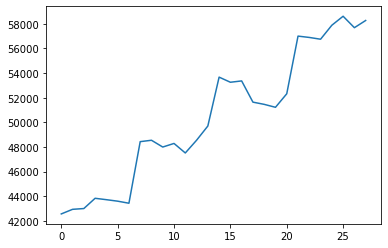

In [65]:
sns.lineplot(x=range(28), y=np.sqrt(np.mean((historical.values - y.values)**2, axis=0)))